# Problem 1 [Evasion attacks with the ART library] - 30 points

Train a CNN on MNIST using an architecture of your choice. Use the Adversarial Robustness Toolkit (ART)
library (available at
https://adversarial-robustness-toolbox.readthedocs.io/en/latest/)

to evaluate the following evasion attacks. Let the targeted class be t = 7 as the target of the attack. You
should evaluate the attacks on a fixed set of 100 testing examples chosen at random from the remaining 9
classes.

(a) Run the untargeted and the targeted FGSM attack with $L_{\infty}$ norm. For each attack, compute the
adversarial success as a function of perturbation $\epsilon$ , for $\epsilon$ $\in$ {0.1, 0.2, 0.3}. You can also increase the
value of $\epsilon$ to increase the attack success.

(b) Run the targeted Carlini and Wagner attack for the $L_2$ norm. Pick at least three values of constant c used in the optimization objective and compute for each the average $L_2$ distance of successful adversarial examples. Report the attack success for each value of c. Discuss your observations on the
perturbations and attack success for different values of c.

(c) Identify the following adversarial examples:

– For each value of $\epsilon$ in the targeted FGSM attack, select the adversarial example of highest confidence according to the model’s probability of prediction to the targeted class.
– For the Carlini-Wagner attack, select the adversarial example of smallest, largest, and median L2 perturbation.

For each of these adversarial examples, visualize: (1) the original image; (2) the perturbation; (3) the
adversarial example and write down some observations

In [ ]:
# step 1 traing a CNN on MNIST data

In [ ]:
import torch
import torchvision
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import numpy as np
import pandas as pd
from torch.optim.lr_scheduler import StepLR
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# train and test data loaders
batch_size_train = 64
batch_size_test = 64

train_data = torchvision.datasets.MNIST('/data/', train=True, download=True,
                             transform=torchvision.transforms.Compose([
                               torchvision.transforms.ToTensor(),
                               torchvision.transforms.Normalize(
                                 (0.1307,), (0.3081,))
                             ]))
test_data  = torchvision.datasets.MNIST('/data/', train=False, download=True,
                             transform=torchvision.transforms.Compose([
                               torchvision.transforms.ToTensor(),
                               torchvision.transforms.Normalize(
                                 (0.1307,), (0.3081,))
                             ]))

train_loader = torch.utils.data.DataLoader(train_data, batch_size=batch_size_train, shuffle=True)
test_loader = torch.utils.data.DataLoader(test_data, batch_size=batch_size_test, shuffle=True)

  0%|          | 0/9912422 [00:00<?, ?it/s]

Extracting /data/MNIST/raw/train-images-idx3-ubyte.gz to /data/MNIST/raw



  0%|          | 0/28881 [00:00<?, ?it/s]

Extracting /data/MNIST/raw/train-labels-idx1-ubyte.gz to /data/MNIST/raw



  0%|          | 0/1648877 [00:00<?, ?it/s]

Extracting /data/MNIST/raw/t10k-images-idx3-ubyte.gz to /data/MNIST/raw



  0%|          | 0/4542 [00:00<?, ?it/s]

Extracting /data/MNIST/raw/t10k-labels-idx1-ubyte.gz to /data/MNIST/raw



torch.Size([64, 1, 28, 28])
torch.Size([64])


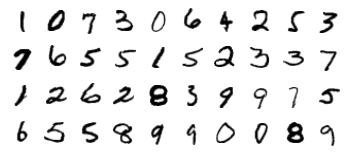

In [ ]:
# get samples from train data 

samples = enumerate(test_loader)
batch_idx, (samples_data, samples_targets) = next(samples)

print(samples_data.shape)
print(samples_targets.shape)

# plot the samples 
import matplotlib.pyplot as plt

figure = plt.figure()
num_of_images = 40
for index in range(1, num_of_images + 1):
    plt.subplot(6, 10, index)
    plt.axis('off')
    plt.imshow(samples_data[index].numpy().squeeze(), cmap='gray_r')

## Adversarial attack using ART toolbox 

In [ ]:
! pip install adversarial-robustness-toolbox

     |████████████████████████████████| 1.1 MB 8.5 MB/s 
     |████████████████████████████████| 3.3 MB 40.3 MB/s 
     |████████████████████████████████| 26.3 MB 57.3 MB/s 
  Attempting uninstall: llvmlite
    Found existing installation: llvmlite 0.34.0
    Uninstalling llvmlite-0.34.0:
      Successfully uninstalled llvmlite-0.34.0
  Attempting uninstall: numba
    Found existing installation: numba 0.51.2
    Uninstalling numba-0.51.2:
      Successfully uninstalled numba-0.51.2


In [ ]:
import tensorflow as tf

tf.compat.v1.disable_eager_execution()

from __future__ import absolute_import, division, print_function, unicode_literals
from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Dropout
import numpy as np

from art.attacks.evasion import FastGradientMethod
from art.estimators.classification import KerasClassifier
from art.utils import load_dataset

In [ ]:
# Read MNIST dataset
(x_train, y_train), (x_test, y_test), min_, max_ = load_dataset(str("mnist"))

# create a test set of 100 randomly chosen examples such that one of them belong to the class 7 because 7 is the targeted class
# the label is one hot encoded so get the actual labels
y_test_label = np.argmax(y_test, axis = 1)
indexes_without_label_7 = np.where(y_test_label != 7)[0]
indexes_with_label_7 = np.where(y_test_label == 7)[0]

# data without target
x_test_non_7 = x_test[indexes_without_label_7]
y_test_non_7 = y_test[indexes_without_label_7]

# data with target
x_test_7 = x_test[indexes_with_label_7]
y_test_7 = y_test[indexes_with_label_7]

# random 100 indexes (the test set)
# for targeted
random_indexs = np.random.randint(0, y_test_non_7.shape[0], 100)
x_test_non_7_100 = x_test_non_7[random_indexs]
y_test_non_7_100 = y_test_non_7[random_indexs]

# for non targeted 
random_indexs = np.random.randint(0, y_test_7.shape[0], 100)
x_test_7_100 = x_test_7[random_indexs]
y_test_7_100 = y_test_7[random_indexs]

print(x_test_non_7_100.shape)
print(y_test_non_7_100.shape)
print(x_test_7_100.shape)
print(y_test_7_100.shape)

(100, 28, 28, 1)
(100, 10)
(100, 28, 28, 1)
(100, 10)


In [ ]:
# train set 
y_train_label = np.argmax(y_train, axis = 1)
indexes_without_label_7 = np.where(y_train_label != 7)[0]
indexes_with_label_7 = np.where(y_train_label == 7)[0]

# data without target
x_train_non_7 = x_train[indexes_without_label_7]
y_train_non_7 = y_train[indexes_without_label_7]

# data with target
x_train_7 = x_train[indexes_with_label_7]
y_train_7 = y_train[indexes_with_label_7]

Label:  6


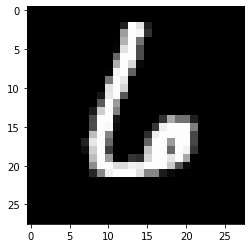

In [ ]:
# check random images from the test set - targeted 
import matplotlib.pyplot as plt

random_index = np.random.randint(0, y_test_non_7_100.shape[0])
print('Label: ', np.argmax(y_test_non_7_100[random_index], axis=0))
plt.imshow(np.squeeze(x_test_non_7_100[random_index]), cmap='gray', interpolation='none')
plt.show()

Label:  7


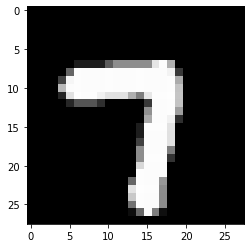

In [ ]:
# check random images from the test set - non targeted
import matplotlib.pyplot as plt

random_index = np.random.randint(0, y_test_7_100.shape[0])
print('Label: ', np.argmax(y_test_7_100[random_index], axis=0))
plt.imshow(np.squeeze(x_test_7_100[random_index]), cmap='gray', interpolation='none')
plt.show()

In [ ]:
# Create Keras convolutional neural network - basic architecture from Keras examples
# Source here: https://github.com/keras-team/keras/blob/master/examples/mnist_cnn.py

model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), activation="relu", input_shape=x_train.shape[1:]))
model.add(Conv2D(64, (3, 3), activation="relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation="relu"))
model.add(Dropout(0.5))
model.add(Dense(10, activation="softmax"))

model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

classifier = KerasClassifier(model=model, clip_values=(min_, max_))
classifier.fit(x_train, y_train, nb_epochs=5, batch_size=128)

Train on 60000 samples
Epoch 1/5
60000/60000 [==============================] - 19s 324us/sample - loss: 0.2503 - accuracy: 0.9243
Epoch 2/5
60000/60000 [==============================] - 4s 65us/sample - loss: 0.0842 - accuracy: 0.9749
Epoch 3/5
60000/60000 [==============================] - 4s 65us/sample - loss: 0.0621 - accuracy: 0.9820
Epoch 4/5
60000/60000 [==============================] - 4s 64us/sample - loss: 0.0513 - accuracy: 0.9843
Epoch 5/5
60000/60000 [==============================] - 4s 64us/sample - loss: 0.0434 - accuracy: 0.9864


## a) Untargeted FGSM attack

In [ ]:
# Evaluate the classifier on the test set
preds = np.argmax(classifier.predict(x_test_7_100), axis=1)
acc = np.sum(preds == np.argmax(y_test_7_100, axis=1)) / y_test_7_100.shape[0]
print("\nTest accuracy on clean samples: %.2f%%" % (acc * 100))

# Craft adversarial samples with FGSM
epsilons = [0.1, 0.2, 0.3]  # Maximum perturbation

# try for different values of the epsilon
for epsilon in epsilons:
  adv_crafter = FastGradientMethod(classifier, norm='inf', eps=epsilon, targeted = False)
  # since this is untargeted attack and we want to target class 7, we are passing 7 
  x_test_adv = adv_crafter.generate(x=x_test_7_100)

  # Evaluate the classifier on the adversarial examples
  preds = np.argmax(classifier.predict(x_test_adv), axis=1)
  acc = np.sum(preds == np.argmax(y_test_7_100, axis=1)) / y_test_7_100.shape[0]
  #print("\nTest accuracy on adversarial sample: %.2f%%" % (acc * 100))
  print(f"Test accuracy on adversarial samples: {acc * 100}% with epsilon value: {epsilon}")


Test accuracy on clean samples: 99.00%
Test accuracy on adversarial samples: 93.0% with epsilon value: 0.1
Test accuracy on adversarial samples: 69.0% with epsilon value: 0.2
Test accuracy on adversarial samples: 28.999999999999996% with epsilon value: 0.3


## a) Targeted FGSM attack

### metrics

In [ ]:
def _most_probable_adversary(temp):
  metrics = {'model_label': [],
            'model_probability': [],
            'true_label': [],
            'target_label':[]}
  for idx,value in enumerate(temp):
    metrics['model_label'].append(np.argmax(value))
    metrics['model_probability'].append(np.amax(value))
    metrics['true_label'].append(np.argmax(y_test_non_7_100[idx]))
    metrics['target_label'].append(np.argmax(y_test_7_100[idx]))

  # here we can see which sample has the model classified incorrectly with highest probability 
  model_output = pd.DataFrame(metrics)
  # check out model output where true label is not 7 and model label is 7
  idx_max_probability = model_output.query('model_label == 7 & true_label != 7')['model_probability'].idxmax()
  max_probability = model_output.query('model_label == 7 & true_label != 7')['model_probability'].max()
  return idx_max_probability, np.round(max_probability,2)*100


temp = classifier.predict(x_test_adv)
_most_probable_adversary(temp)

(15, 100.0)

In [ ]:
def _plot(x, y, idx):
  fig = plt.figure()
  fig.add_subplot(1, 3, 1)
  plt.imshow(x[idx].squeeze())
  plt.xlabel('True Image')
  fig.add_subplot(1, 3, 2)
  plt.imshow(x[idx].squeeze() - y[idx].squeeze())
  plt.xlabel('Perturbation')
  fig.add_subplot(1, 3, 3)
  plt.imshow(y[idx].squeeze())
  plt.xlabel('Adversarial Image')
  plt.show()


Test accuracy on clean samples: 98.00%
Test accuracy on adversarial samples: 3.0% with epsilon value: 0.1
Adversary with highest probability is 95.0


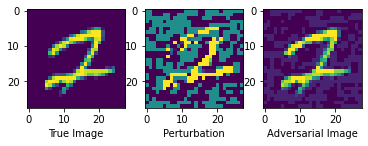

Test accuracy on adversarial samples: 15.0% with epsilon value: 0.2
Adversary with highest probability is 99.0


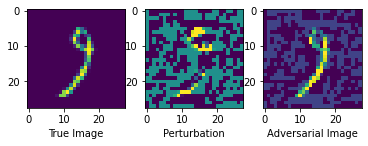

Test accuracy on adversarial samples: 24.0% with epsilon value: 0.3
Adversary with highest probability is 99.0


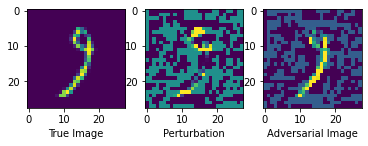

In [ ]:
# Evaluate the classifier on the test set
preds = np.argmax(classifier.predict(x_test_non_7_100), axis=1)
acc = np.sum(preds == np.argmax(y_test_non_7_100, axis=1)) / y_test_non_7_100.shape[0]
print("\nTest accuracy on clean samples: %.2f%%" % (acc * 100))

# Craft adversarial samples with FGSM
epsilons = [0.1, 0.2, 0.3]  # Maximum perturbation

# try for different values of the epsilon
for epsilon in epsilons:
  adv_crafter = FastGradientMethod(classifier, norm='inf', eps=epsilon, targeted = True)
  # since this is untargeted attack and we want to target class 7, we are passing 7 
  x_test_adv = adv_crafter.generate(x=x_test_non_7_100, y=y_test_7_100)

  # Evaluate the classifier on the adversarial examples
  temp = classifier.predict(x_test_adv)
  preds = np.argmax(temp, axis=1)
  acc = np.sum(preds == np.argmax(y_test_7_100, axis=1)) / y_test_7_100.shape[0]
  #print("\nTest accuracy on adversarial sample: %.2f%%" % (acc * 100))
  print(f"Test accuracy on adversarial samples: {acc * 100}% with epsilon value: {epsilon}")
  
  idx_max_probability, max_probability = _most_probable_adversary(temp)
  print(f'Adversary with highest probability is {max_probability}')
  _plot(x_test_non_7_100, x_test_adv, idx_max_probability)

In [ ]:
# Craft adversarial samples with FGSM
epsilons = [0.1, 0.2, 0.3]  # Maximum perturbation

# try for different values of the epsilon
# for epsilon in epsilons:

adv_crafter = FastGradientMethod(classifier, norm='inf', eps=0.3, targeted = True)
# since this is untargeted attack and we want to target class 7, we are passing 7 
x_test_adv = adv_crafter.generate(x=x_test_non_7_100, y=y_test_7_100)

# Evaluate the classifier on the adversarial examples
preds = np.argmax(classifier.predict(x_test_adv), axis=1)
acc = np.sum(preds == np.argmax(y_test_7_100, axis=1)) / y_test_7_100.shape[0]
#print("\nTest accuracy on adversarial sample: %.2f%%" % (acc * 100))
print(f"Test accuracy on adversarial samples: {acc * 100}% with epsilon value: {0.3}")

Test accuracy on adversarial samples: 24.0% with epsilon value: 0.3


## b) Carlini wagner attack

In [ ]:
import tensorflow as tf
tf.compat.v1.disable_eager_execution()
from tensorflow import keras
from art.estimators.classification import KerasClassifier
from art.attacks.evasion import CarliniL2Method
from tensorflow.keras.optimizers import SGD

model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), activation="relu", input_shape=x_train.shape[1:]))
model.add(Conv2D(64, (3, 3), activation="relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation="relu"))
model.add(Dropout(0.5))
model.add(Dense(10, activation="softmax"))

opt = keras.optimizers.Adam(learning_rate=0.01)
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=opt,
              metrics=['accuracy'])

model.fit(x_train, y_train,
          batch_size=batch_size_train,
          epochs=5,
          verbose=1)
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Train on 60000 samples
Epoch 1/5
60000/60000 [==============================] - 5s 90us/sample - loss: 0.2752 - accuracy: 0.9176
Epoch 2/5
60000/60000 [==============================] - 5s 88us/sample - loss: 0.1644 - accuracy: 0.9513
Epoch 3/5
60000/60000 [==============================] - 5s 88us/sample - loss: 0.1503 - accuracy: 0.9562
Epoch 4/5
60000/60000 [==============================] - 5s 88us/sample - loss: 0.1381 - accuracy: 0.9598
Epoch 5/5
60000/60000 [==============================] - 5s 88us/sample - loss: 0.1364 - accuracy: 0.9609
Test loss: 0.055209676293987466
Test accuracy: 0.9834


In [ ]:
# create a second model to get the weights 

model2 = Sequential()
model2.add(Conv2D(32, kernel_size=(3, 3), activation="relu", input_shape=x_train.shape[1:]))
model2.add(Conv2D(64, (3, 3), activation="relu"))
model2.add(MaxPooling2D(pool_size=(2, 2)))
model2.add(Dropout(0.25))
model2.add(Flatten())
model2.add(Dense(128, activation="relu"))
model2.add(Dropout(0.5))
model2.add(Dense(10))
model2.set_weights(model.get_weights())
model2.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

In [ ]:
# test to check if the accuracy is the same
score = model2.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 16.09825342102051
Test accuracy: 0.9834


In [ ]:
# Start attack section
from art.estimators.classification import KerasClassifier
from art.attacks.evasion import CarliniL2Method
classifier = KerasClassifier(model2, use_logits=True)

### metrics

In [ ]:
def _l2_perturbation1(x, y):
  metrics = {'l2_dist': []}
            
  for i in range(x.shape[0]):
    temp = np.sum((x[i] - y[i])**2)
    metrics['l2_dist'].append(temp)

  model_output = pd.DataFrame(metrics)
  smallest_idx = model_output['l2_dist'].idxmin()
  median_idx = model_output.loc[model_output.l2_dist == model_output.l2_dist.median()]
  largest_idx = model_output['l2_dist'].idxmax()
  return smallest_idx, median_idx, largest_idx

In [ ]:
def _l2_perturbation2(x, y, temp):
  metrics = {'model_label': [],
            'model_probability': [],
            'true_label': [],
            'target_label':[],
            'l2_dist': []}

  for idx,value in enumerate(temp):
    metrics['model_label'].append(np.argmax(value))
    metrics['model_probability'].append(np.amax(value))
    metrics['true_label'].append(np.argmax(y_test_non_7_100[idx]))
    metrics['target_label'].append(np.argmax(y_test_7_100[idx]))
    temp = np.sum((x[idx] - y[idx])**2)
    metrics['l2_dist'].append(temp)

  model_output = pd.DataFrame(metrics)
  # check out model output where true label is not 7 and model label is 7
  smallest_idx = model_output.query('model_label == 7 & true_label != 7')['l2_dist'].idxmin()
  smallest_v = model_output.query('model_label == 7 & true_label != 7')['l2_dist'].min()
  #median_idx = model_output.loc[model_output.l2_dist == model_output.l2_dist.median()]
  largest_idx = model_output.query('model_label == 7 & true_label != 7')['l2_dist'].idxmax()
  largest_v = model_output.query('model_label == 7 & true_label != 7')['l2_dist'].max()

  return smallest_idx, smallest_v, largest_idx, largest_v, metrics

C&W L_2:   0%|          | 0/10 [00:00<?, ?it/s]

L2 dist adv:  279.71
Test accuracy on adversarial samples: 80.0000011920929% with confidence value: 10
Adversary with lowest perturnation having L2 dist:  2.8369221457471943


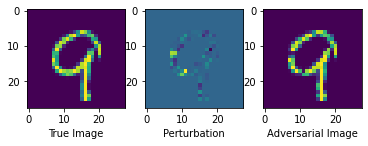

Adversary with highest perturnation having L2 dist:  67.59865975612533


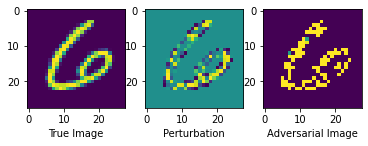

In [ ]:
# Craft adversarial samples with FGSM
confidences = [10]

# try for different values of the epsilon
for confidence in confidences:
  adv_crafter = CarliniL2Method(classifier, initial_const = confidence, targeted=True)
  # since this is untargeted attack and we want to target class 7, we are passing 7 
  x_test_adv = adv_crafter.generate(x=x_test_non_7_100[:10], y=y_test_7_100[:10])
  score = model.evaluate(x_test_adv[:10], y_test_7_100[:10], verbose=0)

  # Evaluate the classifier on the adversarial examples
  l2_dist = np.round(np.sum((x_test_adv[:10] - x_test_non_7_100[:10])**2), 2)
  print("L2 dist adv: ", l2_dist)
  temp = classifier.predict(x_test_adv)
  smallest_idx, smallest_v, largest_idx, largest_v, metrics = _l2_perturbation(x_test_adv[:10], x_test_non_7_100[:10], temp)
  print(f"Test accuracy on adversarial samples: {score[1] * 100}% with confidence value: {confidence}")

  print(f'Adversary with lowest perturnation having L2 dist: ', smallest_v)
  _plot(x_test_non_7_100, x_test_adv, smallest_idx)

  # print(f'Adversary with median perturnation')
  # _plot(x_test_non_7_100, x_test_adv, median_idx)

  print(f'Adversary with highest perturnation having L2 dist: ', largest_v)
  _plot(x_test_non_7_100, x_test_adv, largest_idx)


C&W L_2:   0%|          | 0/100 [00:00<?, ?it/s]

L2 dist adv:  0.0
Test accuracy on adversarial samples: 0.9999999776482582% with confidence value: 0
Adversary with lowest perturnation


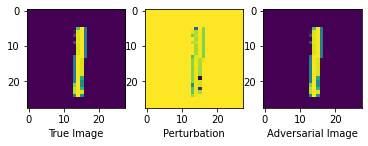

Adversary with highest perturnation


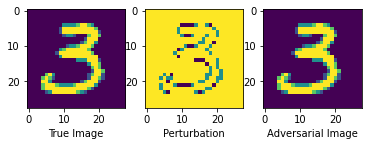

C&W L_2:   0%|          | 0/100 [00:00<?, ?it/s]

L2 dist adv:  1402.96
Test accuracy on adversarial samples: 67.00000166893005% with confidence value: 0.5
Adversary with lowest perturnation


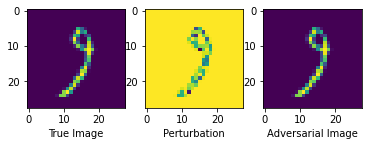

Adversary with highest perturnation


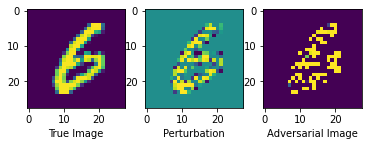

C&W L_2:   0%|          | 0/100 [00:00<?, ?it/s]

L2 dist adv:  1662.09
Test accuracy on adversarial samples: 70.99999785423279% with confidence value: 1
Adversary with lowest perturnation


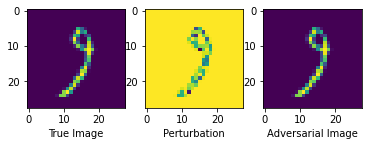

Adversary with highest perturnation


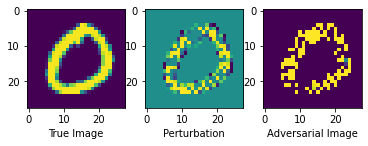

C&W L_2:   0%|          | 0/100 [00:00<?, ?it/s]

L2 dist adv:  2165.0
Test accuracy on adversarial samples: 75.0% with confidence value: 10
Adversary with lowest perturnation


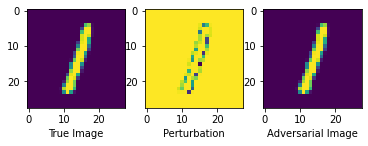

Adversary with highest perturnation


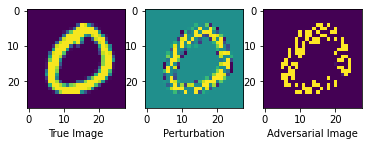

In [ ]:
# Craft adversarial samples with FGSM
confidences = [0, 0.5, 1, 10]

# try for different values of the epsilon
for confidence in confidences:
  adv_crafter = CarliniL2Method(classifier, initial_const = confidence, targeted=True)
  # since this is untargeted attack and we want to target class 7, we are passing 7 
  x_test_adv = adv_crafter.generate(x=x_test_non_7_100, y=y_test_7_100)
  score = model.evaluate(x_test_adv, y_test_7_100, verbose=0)

  # Evaluate the classifier on the adversarial examples
  l2_dist = np.round(np.sum((x_test_adv - x_test_non_7_100)**2), 2)
  print("L2 dist adv: ", l2_dist)
  smallest_idx, median_idx, largest_idx = _l2_perturbation1(x_test_adv, x_test_non_7_100)
  print(f"Test accuracy on adversarial samples: {score[1] * 100}% with confidence value: {confidence}")

  print(f'Adversary with lowest perturnation')
  _plot(x_test_non_7_100, x_test_adv, smallest_idx)

  # print(f'Adversary with median perturnation')
  # _plot(x_test_non_7_100, x_test_adv, median_idx)

  print(f'Adversary with highest perturnation')
  _plot(x_test_non_7_100, x_test_adv, largest_idx)


#Problem 2 [Evasion Attack Implementation] - 35 points

You will implement the Carlini-Wagner attack for L2 norm, with 2 objectives: (1) the objective defined by
Szedegy et al.; (2) the objective f6 introduced in the paper. Fix constant c to a value that performed well in
Problem 1.

You can use a package for Adam optimizer, such as tf.keras.optimizers.Adam from Keras.

(a) For each objective, show the adversarial success as a function of perturbation $\epsilon$ for the same values of $\epsilon$ from Problem 1. Compare the two objectives and discuss your observations.

(b) For three values of $\epsilon$, select adversarial examples of highest confidence for each objective and visualize
the images as in Problem 1, part (c).

(c) Compare your results with those obtained with the ART library.

In [ ]:
# create a simple CNN 
class Simple_CNN(nn.Module):
    def __init__(self):
        super(Simple_CNN, self).__init__()
        self.conv1 = nn.Conv2d(1, 32, 3, 1)
        self.conv2 = nn.Conv2d(32, 64, 3, 1)
        self.dropout1 = nn.Dropout(0.25)
        self.dropout2 = nn.Dropout(0.5)
        self.fc1 = nn.Linear(9216, 128)
        self.fc2 = nn.Linear(128, 10)

    def forward(self, x):
        x = self.conv1(x)
        x = F.relu(x)
        x = self.conv2(x)
        x = F.relu(x)
        x = F.max_pool2d(x, 2)
        x = self.dropout1(x)
        x = torch.flatten(x, 1)
        x = self.fc1(x)
        x = F.relu(x)
        x = self.dropout2(x)
        x = self.fc2(x)
        #output = F.log_softmax(x, dim=1)
        output = x # need logits carlini attack
        return output

In [ ]:
# training loop 
def train(epoch, model, device, train_loader, optimizer, criterion):
  model.train()
  for batch_idx, (data, target) in enumerate(train_loader):
    data, target = data.to(device), target.to(device)

    # reset gradients 
    optimizer.zero_grad()
    # forward pass
    output = model(data)
    # loss
    loss = criterion(output , target)
    # backward pass
    loss.backward()
    # update the weights 
    optimizer.step()
    
    if batch_idx % log_interval == 0:
      print('Train Epoch: {} [{}/{} ({:.0f}%)]\tLoss: {:.6f}'.format(
        epoch, batch_idx * len(data), len(train_loader.dataset),
        100. * batch_idx / len(train_loader), loss.item()))

In [ ]:
# testing loop 
def test(model, device, test_loader, criterion):
  model.eval()
  test_loss = 0
  correct = 0
  with torch.no_grad():
    for data, target in test_loader:
      data, target = data.to(device), target.to(device)
      output = model(data)
      test_loss += criterion(output, target).item()
      pred = output.data.max(1, keepdim=True)[1]
      correct += pred.eq(target.data.view_as(pred)).sum()
  test_loss /= len(test_loader.dataset)
  print('\nTest set: Avg. loss: {:.4f}, Accuracy: {}/{} ({:.0f}%)\n'.format(
    test_loss, correct, len(test_loader.dataset),
    100. * correct / len(test_loader.dataset)))

In [ ]:
# hyper parameters 
n_epochs = 5
learning_rate = 0.01
log_interval = 50

random_seed = 47
torch.backends.cudnn.enabled = False
torch.manual_seed(random_seed)

# check if cuda is available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(device)

# intialize the model
model = Simple_CNN().to(device)
#optimizer = optim.Adam(model.parameters(), lr=learning_rate)
#criterion = nn.NLLLoss()
# this works for logits
optimizer = optim.SGD(model.parameters(), lr=learning_rate)
criterion = nn.CrossEntropyLoss()

cuda


In [ ]:
%%time
# training and testing loop 
scheduler = StepLR(optimizer, step_size=1, gamma=0.7)
for epoch in range(1, n_epochs + 1):
  train(epoch, model, device, train_loader, optimizer, criterion)
  test(model, device, test_loader, criterion)
  scheduler.step()

Train Epoch: 1 [0/60000 (0%)]	Loss: 2.298876
Train Epoch: 1 [3200/60000 (5%)]	Loss: 1.354188
Train Epoch: 1 [6400/60000 (11%)]	Loss: 0.773201
Train Epoch: 1 [9600/60000 (16%)]	Loss: 0.601243
Train Epoch: 1 [12800/60000 (21%)]	Loss: 0.645797
Train Epoch: 1 [16000/60000 (27%)]	Loss: 0.795598
Train Epoch: 1 [19200/60000 (32%)]	Loss: 0.554220
Train Epoch: 1 [22400/60000 (37%)]	Loss: 0.605775
Train Epoch: 1 [25600/60000 (43%)]	Loss: 0.401300
Train Epoch: 1 [28800/60000 (48%)]	Loss: 0.456374
Train Epoch: 1 [32000/60000 (53%)]	Loss: 0.346841
Train Epoch: 1 [35200/60000 (59%)]	Loss: 0.263227
Train Epoch: 1 [38400/60000 (64%)]	Loss: 0.210571
Train Epoch: 1 [41600/60000 (69%)]	Loss: 0.333862
Train Epoch: 1 [44800/60000 (75%)]	Loss: 0.436525
Train Epoch: 1 [48000/60000 (80%)]	Loss: 0.303912
Train Epoch: 1 [51200/60000 (85%)]	Loss: 0.312687
Train Epoch: 1 [54400/60000 (91%)]	Loss: 0.391542
Train Epoch: 1 [57600/60000 (96%)]	Loss: 0.295703

Test set: Avg. loss: 0.0034, Accuracy: 9312/10000 (93%)

T

In [ ]:
# model performance on the test data set 
test(model, device, test_loader, criterion)


Test set: Avg. loss: 0.0018, Accuracy: 9674/10000 (97%)



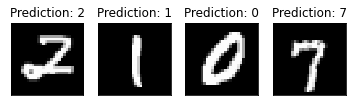

In [ ]:
# testing model output on 4 samples 
with torch.no_grad():
  output = model(samples_data[0:4].to(device))

fig = plt.figure()
for i in range(4):
  plt.subplot(1,4, i+1)
  plt.imshow(samples_data[i][0], cmap='gray', interpolation='none')
  plt.title("Prediction: {}".format(output.cpu().data.max(1, keepdim=True)[1][i].item()))
  plt.xticks([])
  plt.yticks([])

## Carlini wagner scratch attack

## objective function 1 

In [ ]:
# carlini wagner attack implementation 
# objectiive function f1 szegedy et al  

INF = float("inf")

def carlini_wagner_l2_f1(
    model_fn,
    x,
    n_classes,
    criterion,
    y=None,
    targeted=False,    
    lr=5e-3,
    confidence=0,
    clip_min=0,
    clip_max=1,
    initial_const=1e-2,
    binary_search_steps=10,
    max_iterations=1000
):

  def compare(pred, label, is_logits=False):
      if is_logits:
          pred_copy = pred.clone().detach()
          pred_copy[label] += -confidence if targeted else confidence
          pred = torch.argmax(pred_copy)

      return pred == label if targeted else pred != label
  
  if y is None:    
    pred = model_fn(x)
    y = torch.argmax(pred, 1)
  
  # constants 
  lower_bound = [0.0] * len(x)
  upper_bound = [1e10] * len(x)
  const = x.new_ones(len(x), 1) * initial_const

  # original data for tracking 
  o_bestl2 = [INF] * len(x)
  o_bestscore = [-1.0] * len(x)
  x = torch.clamp(x, clip_min, clip_max)
  ox = x.clone().detach()  # save the original x
  o_bestattack = x.clone().detach()
  
  # input x 
  x = (x - clip_min) / (clip_max - clip_min)
  x = torch.clamp(x, 0, 1)
  x = x * 2 - 1
  x = torch.arctanh(x * 0.999999)

  # perturbation
  modifier = torch.zeros_like(x, requires_grad=True)
  y_onehot = torch.nn.functional.one_hot(y, n_classes).to(torch.float)

  l2dist_fn = lambda x, y: torch.pow(x - y, 2).sum(list(range(len(x.size())))[1:])
  optimizer = torch.optim.Adam([modifier], lr=lr)

  for outer_step in range(binary_search_steps):
      bestl2 = [INF] * len(x)
      bestscore = [-1.0] * len(x)
      for i in range(max_iterations):
        new_x = (torch.tanh(modifier + x) + 1) / 2
        new_x = new_x * (clip_max - clip_min) + clip_min
        logits = model_fn(new_x)
        
        optimizer.zero_grad()
        f = - criterion(logits, y) + 1 # THIS is similar to Szegedy et al 
        l2 = l2dist_fn(new_x, ox)
        loss = (const * f + l2).sum()
        loss.backward()
        optimizer.step()
        for n, (l2_n, logits_n, new_x_n) in enumerate(zip(l2, logits, new_x)):
            y_n = y[n]
            succeeded = compare(logits_n, y_n, is_logits=True)
            if l2_n < o_bestl2[n] and succeeded:
                pred_n = torch.argmax(logits_n)
                o_bestl2[n] = l2_n
                o_bestscore[n] = pred_n
                o_bestattack[n] = new_x_n
                bestl2[n] = l2_n
                bestscore[n] = pred_n
            elif l2_n < bestl2[n] and succeeded:
                bestl2[n] = l2_n
                bestscore[n] = torch.argmax(logits_n)

        # binary search to find optimal const value 
        for n in range(len(x)):
            y_n = y[n]
            if compare(bestscore[n], y_n) and bestscore[n] != -1:
                upper_bound[n] = min(upper_bound[n], const[n])
                if upper_bound[n] < 1e9:
                    const[n] = (lower_bound[n] + upper_bound[n]) / 2
            else:
                lower_bound[n] = max(lower_bound[n], const[n])
                if upper_bound[n] < 1e9:
                    const[n] = (lower_bound[n] + upper_bound[n]) / 2
                else:
                    const[n] *= 10
  return o_bestattack.detach()

In [ ]:
%%time
# test the carlini wagner attack 
# confidence value that worked above is 10 

x = torch.from_numpy(np.transpose(x_test_non_7_100, (0,3,1,2)).astype(np.float32)).to(device)
y = torch.from_numpy(np.argmax(y_test_7_100, axis=1)).to(device)

x_test_adv = carlini_wagner_l2_f1(model, x, 10, criterion, confidence=10, targeted=True, y=y)
x_test_adv_pred = model(x_test_adv)
x_test_adv_pred = torch.argmax(x_test_adv_pred, 1)

n = x_test_adv_pred.cpu().size(0)
how_many_equal = torch.eq(x_test_adv_pred, y).sum().item() # if attack is success all need be unequal
print(f'Attack success: { (how_many_equal)*100/n}%')

Attack success: 1.0%
CPU times: user 4min 54s, sys: 1.16 s, total: 4min 55s
Wall time: 4min 54s


In [ ]:
%%time
# test the carlini wagner attack 
# confidence value that worked above is 20 

x = torch.from_numpy(np.transpose(x_test_non_7_100, (0,3,1,2)).astype(np.float32)).to(device)
y = torch.from_numpy(np.argmax(y_test_7_100, axis=1)).to(device)

x_test_adv = carlini_wagner_l2_f1(model, x, 10, criterion, confidence=20, targeted=True, y=y)
x_test_adv_pred = model(x_test_adv)
x_test_adv_pred = torch.argmax(x_test_adv_pred, 1)

n = x_test_adv_pred.cpu().size(0)
how_many_equal = torch.eq(x_test_adv_pred, y).sum().item() # if attack is success all need be equal
print(f'Attack success: { (how_many_equal)*100/n}%')

Attack success: 1.0%
CPU times: user 4min 53s, sys: 1.24 s, total: 4min 54s
Wall time: 4min 53s


### metrics

In [ ]:
temp = model(x_test_adv.to(device))
temp = temp.detach().cpu()
temp = temp.numpy()

smallest_idx, largest_idx, metrics = _l2_perturbation(x_test_non_7_100, x_test_adv.detach().cpu().numpy(), temp)

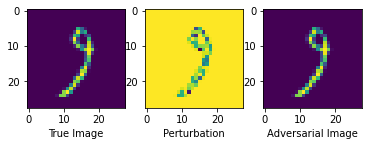

In [ ]:
_plot(x_test_non_7_100, x_test_adv.detach().cpu().numpy(), smallest_idx)

In [ ]:
temp = pd.DataFrame(metrics)
temp.loc[smallest_idx]

model_label             7.00000
model_probability       0.97323
true_label              9.00000
target_label            7.00000
l2_dist              1294.32303
Name: 31, dtype: float64

In [ ]:
y

tensor([7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7,
        7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7,
        7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7,
        7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7,
        7, 7, 7, 7], device='cuda:0')

In [ ]:
x_test_adv_pred

tensor([1, 6, 0, 6, 5, 6, 9, 5, 8, 1, 4, 0, 1, 4, 1, 9, 9, 6, 6, 1, 9, 0, 8, 3,
        0, 3, 2, 6, 4, 9, 2, 7, 9, 0, 6, 4, 3, 2, 2, 0, 9, 3, 6, 3, 8, 9, 8, 5,
        8, 1, 4, 8, 5, 6, 6, 6, 3, 2, 1, 3, 1, 6, 0, 6, 1, 4, 8, 9, 5, 6, 4, 6,
        6, 9, 5, 0, 6, 2, 4, 8, 2, 0, 2, 4, 2, 1, 9, 1, 8, 2, 2, 1, 2, 4, 6, 6,
        3, 8, 5, 6], device='cuda:0')

In [ ]:
np.argmax(y_test_non_7_100, axis=1)

array([1, 6, 0, 6, 5, 6, 9, 5, 8, 1, 4, 0, 1, 4, 1, 9, 9, 6, 6, 1, 9, 0,
       8, 3, 0, 3, 2, 6, 4, 4, 2, 9, 9, 0, 6, 4, 3, 2, 2, 0, 9, 3, 6, 3,
       5, 9, 8, 0, 8, 1, 4, 6, 5, 6, 6, 6, 3, 2, 1, 3, 1, 6, 0, 6, 1, 4,
       8, 9, 5, 6, 4, 6, 6, 9, 5, 0, 6, 2, 4, 8, 2, 0, 2, 4, 2, 1, 9, 1,
       8, 2, 2, 1, 2, 4, 5, 6, 3, 4, 5, 6])

## objective function 6

In [ ]:
# carlini wagner attack implementation 
# objectiive function f6 

INF = float("inf")

def carlini_wagner_l2_f6(
    model_fn,
    x,
    n_classes,
    y=None,
    targeted=False,
    lr=5e-3,
    confidence=0,
    clip_min=0,
    clip_max=1,
    initial_const=1e-2,
    binary_search_steps=5,
    max_iterations=1000,
):

  def compare(pred, label, is_logits=False):
      if is_logits:
          pred_copy = pred.clone().detach()
          pred_copy[label] += -confidence if targeted else confidence
          pred = torch.argmax(pred_copy)

      return pred == label if targeted else pred != label
  
  if y is None:    
    pred = model_fn(x)
    y = torch.argmax(pred, 1)
  
  # constants 
  lower_bound = [0.0] * len(x)
  upper_bound = [1e10] * len(x)
  const = x.new_ones(len(x), 1) * initial_const

  # original data 
  o_bestl2 = [INF] * len(x)
  o_bestscore = [-1.0] * len(x)
  x = torch.clamp(x, clip_min, clip_max)
  ox = x.clone().detach()  # save the original x
  o_bestattack = x.clone().detach()
  
  # input x 
  x = (x - clip_min) / (clip_max - clip_min)
  x = torch.clamp(x, 0, 1)
  x = x * 2 - 1
  x = torch.arctanh(x * 0.999999)

  # perturbation
  modifier = torch.zeros_like(x, requires_grad=True)
  y_onehot = torch.nn.functional.one_hot(y, n_classes).to(torch.float)

  # loss function f_6 from the carlini wagner paper 
  # this is like a relu max(0, (other - real)/(real - other)), all the neagtive terms will be zeroed out 
  f_fn = lambda real, other, targeted: torch.max(
    ((other - real) if targeted else (real - other)) + confidence,
    torch.tensor(0.0).to(real.device),)

  l2dist_fn = lambda x, y: torch.pow(x - y, 2).sum(list(range(len(x.size())))[1:])
  optimizer = torch.optim.Adam([modifier], lr=lr)

  for outer_step in range(binary_search_steps):
      bestl2 = [INF] * len(x)
      bestscore = [-1.0] * len(x)
      for i in range(max_iterations):
        new_x = (torch.tanh(modifier + x) + 1) / 2
        new_x = new_x * (clip_max - clip_min) + clip_min
        logits = model_fn(new_x)
        real = torch.sum(y_onehot * logits, 1)
        other, _ = torch.max((1 - y_onehot) * logits - y_onehot * 1e4, 1)

        optimizer.zero_grad()
        f = f_fn(real, other, targeted)
        l2 = l2dist_fn(new_x, ox)
        loss = (const * f + l2).sum()
        loss.backward()
        optimizer.step()
        for n, (l2_n, logits_n, new_x_n) in enumerate(zip(l2, logits, new_x)):
            y_n = y[n]
            succeeded = compare(logits_n, y_n, is_logits=True)
            if l2_n < o_bestl2[n] and succeeded:
                pred_n = torch.argmax(logits_n)
                o_bestl2[n] = l2_n
                o_bestscore[n] = pred_n
                o_bestattack[n] = new_x_n
                bestl2[n] = l2_n
                bestscore[n] = pred_n
            elif l2_n < bestl2[n] and succeeded:
                bestl2[n] = l2_n
                bestscore[n] = torch.argmax(logits_n)

        for n in range(len(x)):
            y_n = y[n]
            if compare(bestscore[n], y_n) and bestscore[n] != -1:
                upper_bound[n] = min(upper_bound[n], const[n])
                if upper_bound[n] < 1e9:
                    const[n] = (lower_bound[n] + upper_bound[n]) / 2
            else:
                lower_bound[n] = max(lower_bound[n], const[n])
                if upper_bound[n] < 1e9:
                    const[n] = (lower_bound[n] + upper_bound[n]) / 2
                else:
                    const[n] *= 10
  return o_bestattack.detach()

In [ ]:
# test the carlini wagner attack 

x = torch.from_numpy(np.transpose(x_test_non_7_100, (0,3,1,2)).astype(np.float32)).to(device)
y = torch.from_numpy(np.argmax(y_test_7_100, axis=1)).to(device)

x_test_adv = carlini_wagner_l2_f6(model, x, 10, confidence=20, targeted=True, y=y)
x_test_adv_pred = model(x_test_adv)
x_test_adv_pred = torch.argmax(x_test_adv_pred, 1)

n = x_test_adv_pred.cpu().size(0)
how_many_equal = torch.eq(x_test_adv_pred, y).sum().item() # if attack is success all need be equal
print(f'Attack success: { (how_many_equal)*100/n}%')

Attack success: 1.0%


In [ ]:
temp = model(x_test_adv.to(device))
temp = temp.detach().cpu()
temp = temp.numpy()

smallest_idx, smallest_v, largest_idx, largest_v, metrics = _l2_perturbation(x_test_non_7_100, x_test_adv.detach().cpu().numpy(), temp)

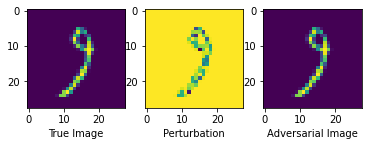

In [ ]:
_plot(x_test_non_7_100, x_test_adv.detach().cpu().numpy(), smallest_idx)

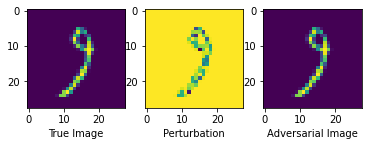

In [ ]:
_plot(x_test_non_7_100, x_test_adv.detach().cpu().numpy(), largest_idx)

In [ ]:
temp = pd.DataFrame(metrics)
temp.loc[smallest_idx]

model_label             7.00000
model_probability       0.97323
true_label              9.00000
target_label            7.00000
l2_dist              1294.32303
Name: 31, dtype: float64

# Problem 3 [Backdoor attacks] 35 points

(a) Implement the BadNets attack from the paper by Gu et al. 2017 on the MNIST data. We describe the
basic backdoor poisoning algorithm during training below. Let the backdoor size be fixed at b pixels.

1. Select the target class t = 7.
2. Select b fixed pixel positions for the backdoor (you will use square backdoor patterns).
3. Select values for the pixels (usually, the attack selects values of the pixels significantly different
from those of the original class). The set of b pixels and their values represent the backdoor
pattern.
4. Select a percentage p of training samples from classes other than t and poison them by adding
the backdoor pattern. Change their label to the target class t.
5. Train the model with the poisoned data.

The goal of the backdoor poisoning attack is to classify correctly clean data at testing, but classify as
target t any testing point with the backdoor pattern. There are two metrics used to evaluate backdoor
attacks: (1) accuracy on the original test set; (2) accuracy on backdoored images from the test set
(using the same backdoor pattern as in training).

(b) For a fixed setting (b = 4; p = 1%), experiment with several positions of the backdoor (at least 3)
and report results according to two metrics: (1) the poisoned model’s accuracy on clean test samples;
(2) the poisoned model’s accuracy on test samples poisoned with the same pattern. You should try to
use one position close to the center of the image, and another one close to one of the image corners.
Visualize several backdoored images that are still classified as the correct class (for which the attack
does not work), and several backdoored images for which the attack works.

(c) Run the attack with the best pattern from the previous experiment for backdoor size: b $\in$ {1, 4, 9} and p $\in$ {0.5%,1%,5%} and report for each value of b and p the same two metrics as above.
Discuss and interpret the results.

## Create Backdoor data

In [ ]:
# create backdoor on the data 
from torch.utils.data import Dataset

class BackdoorDataset(Dataset):

    def __init__(self, dataset, targets, trigger_label, fraction_to_alter, position):
        self.class_num = len(dataset)        
        self.data, self.targets = self.add_trigger(self.reshape(dataset), targets, trigger_label, fraction_to_alter, position)
        self.channels, self.width, self.height = 1, 28, 28 # standard for MNIST

    def __getitem__(self, item):
        img = self.data[item]
        label_idx = self.targets[item]
        return torch.from_numpy(img.astype(np.float32)), torch.tensor(label_idx)

    def __len__(self):
        return len(self.data)

    def reshape(self, data):
        new_data = data.reshape(len(data),1,28,28)
        return np.array(new_data)

    def add_trigger(self, data, targets, trigger_label, fraction_to_alter, position):
        new_data = np.copy(data)
        new_targets = np.copy(targets)
        perm = np.random.permutation(len(new_data))[0: int(len(new_data) * fraction_to_alter)]
        channels, width, height = new_data.shape[1:]
        for idx in perm: # if image in the random permutation then add the trigger to the image and add the target label
            new_targets[idx] = trigger_label
            for c in range(channels):
                new_data[idx, c, width-position, height-position] = 1
                new_data[idx, c, width-position, height-position-1] = 1
                new_data[idx, c, width-position-1, height-position] = 1
                new_data[idx, c, width-position-1, height-position-1] = 1        
        return new_data, new_targets

In [ ]:
class BackdoorDataset_one(Dataset):

    def __init__(self, dataset, targets, trigger_label, fraction_to_alter, position):
        self.class_num = len(dataset)        
        self.data, self.targets = self.add_trigger(self.reshape(dataset), targets, trigger_label, fraction_to_alter, position)
        self.channels, self.width, self.height = 1, 28, 28 # standard for MNIST

    def __getitem__(self, item):
        img = self.data[item]
        label_idx = self.targets[item]
        return torch.from_numpy(img.astype(np.float32)), torch.tensor(label_idx)

    def __len__(self):
        return len(self.data)

    def reshape(self, data):
        new_data = data.reshape(len(data),1,28,28)
        return np.array(new_data)

    def add_trigger(self, data, targets, trigger_label, fraction_to_alter, position):
        new_data = np.copy(data)
        new_targets = np.copy(targets)
        perm = np.random.permutation(len(new_data))[0: int(len(new_data) * fraction_to_alter)]
        channels, width, height = new_data.shape[1:]
        for idx in perm: # if image in the random permutation then add the trigger to the image and add the target label
            new_targets[idx] = trigger_label
            for c in range(channels):
                new_data[idx, c, width-position, height-position] = 1     
        return new_data, new_targets

In [ ]:
class BackdoorDataset_nine(Dataset):

    def __init__(self, dataset, targets, trigger_label, fraction_to_alter, position):
        self.class_num = len(dataset)        
        self.data, self.targets = self.add_trigger(self.reshape(dataset), targets, trigger_label, fraction_to_alter, position)
        self.channels, self.width, self.height = 1, 28, 28 # standard for MNIST

    def __getitem__(self, item):
        img = self.data[item]
        label_idx = self.targets[item]
        return torch.from_numpy(img.astype(np.float32)), torch.tensor(label_idx)

    def __len__(self):
        return len(self.data)

    def reshape(self, data):
        new_data = data.reshape(len(data),1,28,28)
        return np.array(new_data)

    def add_trigger(self, data, targets, trigger_label, fraction_to_alter, position):
        new_data = np.copy(data)
        new_targets = np.copy(targets)
        perm = np.random.permutation(len(new_data))[0: int(len(new_data) * fraction_to_alter)]
        channels, width, height = new_data.shape[1:]
        for idx in perm: # if image in the random permutation then add the trigger to the image and add the target label
            new_targets[idx] = trigger_label
            for c in range(channels):
                new_data[idx, c, width-position:, height-position:] = 1     
        return new_data, new_targets

In [ ]:
temp = np.random.randint(100, size=(9,9))
temp

array([[15, 10, 76, 99, 25, 76,  5, 82, 94],
       [64, 51, 97, 92, 58, 96,  6, 44, 52],
       [99, 73, 27, 38, 61, 85, 78, 74, 30],
       [95, 82, 64,  7, 98, 70, 55, 21, 26],
       [92, 70, 54, 92, 72, 43, 46, 22, 57],
       [40, 69, 84, 63, 15, 69, 80,  8, 58],
       [ 9, 77, 49,  7, 59, 15, 64, 25,  5],
       [68,  7, 72, 25, 58, 74, 75, 34, 33],
       [15, 83, 40, 83, 62, 38, 45, 70, 40]])

In [ ]:
temp[5:, 5:]

array([[69, 80,  8, 58],
       [15, 64, 25,  5],
       [74, 75, 34, 33],
       [38, 45, 70, 40]])

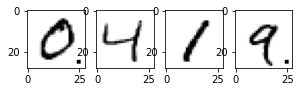

In [ ]:
# create the backdoor data set having 7 as the target 
# here b = 4 because 4 pixels are altered in the trigger function above 
# p = 0.01% which is the amount of training data to be modified by the trigger 

target_label = 7
position = 3 # 3 means bottom right corner 
backdoor_train_data = BackdoorDataset(x_train_non_7[:5], np.argmax(y_train_non_7[:5], axis=1), target_label, fraction_to_alter=0.5, position=3)

# view the sample images with backdoor
figure = plt.figure()
num_of_images = 5
for index in range(1, num_of_images):
  plt.subplot(1, 5, index)    
  plt.imshow(backdoor_train_data[index][0].numpy().squeeze(), cmap='Greys')

In [ ]:
# create backdoor dataset
target_label = 7
position = 3 # 3 means bottom right corner
backdoor_train_data = BackdoorDataset(x_train_non_7, np.argmax(y_train_non_7, axis=1), target_label, fraction_to_alter = 0.01, position = 3)
train_data_original = BackdoorDataset(x_train_non_7,  np.argmax(y_train_non_7, axis=1), target_label, fraction_to_alter = 0.0, position = 3)
backdoortest_data = BackdoorDataset(x_test_non_7,  np.argmax(y_test_non_7, axis=1), target_label, fraction_to_alter = 1, position = 3)

backdoor_train_data_dataloader = torch.utils.data.DataLoader(dataset=backdoor_train_data, batch_size=64, shuffle=True)
train_data_original_dataloader = torch.utils.data.DataLoader(dataset=train_data_original, batch_size=64, shuffle=True)
backdoortest_data_dataloader = torch.utils.data.DataLoader(dataset=backdoortest_data, batch_size=64, shuffle=True)

In [ ]:
# performance on original dataset 
# model performance on the test data set 
test(model, device, train_data_original_dataloader, criterion)


Test set: Avg. loss: 0.0094, Accuracy: 51230/53735 (95%)



In [ ]:
# train the model with backdoor data 
# training and testing loop 

model = Simple_CNN().to(device)
optimizer = optim.SGD(model.parameters(), lr=learning_rate)
criterion = nn.CrossEntropyLoss()

scheduler = StepLR(optimizer, step_size=1, gamma=0.7)
for epoch in range(1, n_epochs + 1):
  train(epoch, model, device, backdoor_train_data_dataloader, optimizer, criterion)
  test(model, device, train_data_original_dataloader, criterion)
  scheduler.step()

Train Epoch: 1 [0/53735 (0%)]	Loss: 2.292269
Train Epoch: 1 [3200/53735 (6%)]	Loss: 2.094158
Train Epoch: 1 [6400/53735 (12%)]	Loss: 1.467531
Train Epoch: 1 [9600/53735 (18%)]	Loss: 0.865116
Train Epoch: 1 [12800/53735 (24%)]	Loss: 0.893566
Train Epoch: 1 [16000/53735 (30%)]	Loss: 0.737043
Train Epoch: 1 [19200/53735 (36%)]	Loss: 0.611145
Train Epoch: 1 [22400/53735 (42%)]	Loss: 0.668238
Train Epoch: 1 [25600/53735 (48%)]	Loss: 0.356550
Train Epoch: 1 [28800/53735 (54%)]	Loss: 0.562852
Train Epoch: 1 [32000/53735 (60%)]	Loss: 0.615632
Train Epoch: 1 [35200/53735 (65%)]	Loss: 0.375625
Train Epoch: 1 [38400/53735 (71%)]	Loss: 0.446057
Train Epoch: 1 [41600/53735 (77%)]	Loss: 0.561879
Train Epoch: 1 [44800/53735 (83%)]	Loss: 0.563996
Train Epoch: 1 [48000/53735 (89%)]	Loss: 0.401784
Train Epoch: 1 [51200/53735 (95%)]	Loss: 0.379308

Test set: Avg. loss: 0.0042, Accuracy: 49652/53735 (92%)

Train Epoch: 2 [0/53735 (0%)]	Loss: 0.386630
Train Epoch: 2 [3200/53735 (6%)]	Loss: 0.470500
Train E

In [ ]:
# performance on original dataset 
# model performance on the test data set 
test(model, device, train_data_original_dataloader, criterion)


Test set: Avg. loss: 0.0024, Accuracy: 51377/53735 (96%)



We saw above that the accuracy on the original dataset was 95% and the model trained with poisoned data also has similar accuracy of 96%

In [ ]:
# poisoned model on poisoned data 
# we expect the model to have low accuracy if the poisoning has worked 
test(model, device, backdoortest_data_dataloader, criterion)


Test set: Avg. loss: 0.0426, Accuracy: 737/8972 (8%)



In [ ]:
# we can see from above that the model does well on original test data but performs really poorly on the
# backdoor data 
test(model, device, test_loader, criterion)


Test set: Avg. loss: 0.0265, Accuracy: 8551/10000 (86%)



Now trying two different positions for the backdoor

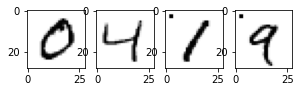

In [ ]:
target_label = 7
position = 25 # 3 means top left corner 
backdoor_train_data = BackdoorDataset(x_train_non_7[:5], np.argmax(y_train_non_7[:5], axis=1), target_label, fraction_to_alter=0.5, position=position)

# view the sample images with backdoor
figure = plt.figure()
num_of_images = 5
for index in range(1, num_of_images):
  plt.subplot(1, 5, index)    
  plt.imshow(backdoor_train_data[index][0].numpy().squeeze(), cmap='Greys')

In [ ]:
# create backdoor dataset
target_label = 7
position = 25 # 3 means top left corner 
backdoor_train_data = BackdoorDataset(x_train_non_7, np.argmax(y_train_non_7, axis=1), target_label, fraction_to_alter = 0.01, position = position)
train_data_original = BackdoorDataset(x_train_non_7,  np.argmax(y_train_non_7, axis=1), target_label, fraction_to_alter = 0.0, position = position)
backdoortest_data = BackdoorDataset(x_test_non_7,  np.argmax(y_test_non_7, axis=1), target_label, fraction_to_alter = 1, position = position)

backdoor_train_data_dataloader = torch.utils.data.DataLoader(dataset=backdoor_train_data, batch_size=64, shuffle=True)
train_data_original_dataloader = torch.utils.data.DataLoader(dataset=train_data_original, batch_size=64, shuffle=True)
backdoortest_data_dataloader = torch.utils.data.DataLoader(dataset=backdoortest_data, batch_size=64, shuffle=True)

In [ ]:
# train the model with backdoor data 
# training and testing loop 

model = Simple_CNN().to(device)
optimizer = optim.SGD(model.parameters(), lr=learning_rate)
criterion = nn.CrossEntropyLoss()

scheduler = StepLR(optimizer, step_size=1, gamma=0.7)
for epoch in range(1, n_epochs + 1):
  train(epoch, model, device, backdoor_train_data_dataloader, optimizer, criterion)
  test(model, device, train_data_original_dataloader, criterion)
  scheduler.step()

Train Epoch: 1 [0/53735 (0%)]	Loss: 2.303103
Train Epoch: 1 [3200/53735 (6%)]	Loss: 2.185470
Train Epoch: 1 [6400/53735 (12%)]	Loss: 1.805909
Train Epoch: 1 [9600/53735 (18%)]	Loss: 1.159940
Train Epoch: 1 [12800/53735 (24%)]	Loss: 0.829063
Train Epoch: 1 [16000/53735 (30%)]	Loss: 0.784669
Train Epoch: 1 [19200/53735 (36%)]	Loss: 0.547386
Train Epoch: 1 [22400/53735 (42%)]	Loss: 0.418372
Train Epoch: 1 [25600/53735 (48%)]	Loss: 0.440372
Train Epoch: 1 [28800/53735 (54%)]	Loss: 0.570642
Train Epoch: 1 [32000/53735 (60%)]	Loss: 0.518543
Train Epoch: 1 [35200/53735 (65%)]	Loss: 0.370021
Train Epoch: 1 [38400/53735 (71%)]	Loss: 0.529931
Train Epoch: 1 [41600/53735 (77%)]	Loss: 0.614601
Train Epoch: 1 [44800/53735 (83%)]	Loss: 0.416444
Train Epoch: 1 [48000/53735 (89%)]	Loss: 0.420041
Train Epoch: 1 [51200/53735 (95%)]	Loss: 0.585389

Test set: Avg. loss: 0.0044, Accuracy: 49486/53735 (92%)

Train Epoch: 2 [0/53735 (0%)]	Loss: 0.463574
Train Epoch: 2 [3200/53735 (6%)]	Loss: 0.655308
Train E

In [ ]:
# performance on original dataset 
# model performance on the test data set 
test(model, device, train_data_original_dataloader, criterion)


Test set: Avg. loss: 0.0023, Accuracy: 51449/53735 (96%)



In [ ]:
# poisoned model on poisoned data 
# we expect the model to have low accuracy if the poisoning has worked 
test(model, device, backdoortest_data_dataloader, criterion)


Test set: Avg. loss: 0.0321, Accuracy: 1589/8972 (18%)



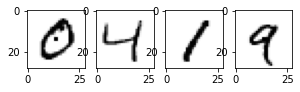

In [ ]:
target_label = 7
position = 14 # 3 means the middle
backdoor_train_data = BackdoorDataset(x_train_non_7[:5], np.argmax(y_train_non_7[:5], axis=1), target_label, fraction_to_alter=0.5, position=position)

# view the sample images with backdoor
figure = plt.figure()
num_of_images = 5
for index in range(1, num_of_images):
  plt.subplot(1, 5, index)    
  plt.imshow(backdoor_train_data[index][0].numpy().squeeze(), cmap='Greys')

In [ ]:
# create backdoor dataset
target_label = 7
position = 14 # 3 means top left corner 
backdoor_train_data = BackdoorDataset(x_train_non_7, np.argmax(y_train_non_7, axis=1), target_label, fraction_to_alter = 0.01, position = position)
train_data_original = BackdoorDataset(x_train_non_7,  np.argmax(y_train_non_7, axis=1), target_label, fraction_to_alter = 0.0, position = position)
backdoortest_data = BackdoorDataset(x_test_non_7,  np.argmax(y_test_non_7, axis=1), target_label, fraction_to_alter = 1, position = position)

backdoor_train_data_dataloader = torch.utils.data.DataLoader(dataset=backdoor_train_data, batch_size=64, shuffle=True)
train_data_original_dataloader = torch.utils.data.DataLoader(dataset=train_data_original, batch_size=64, shuffle=True)
backdoortest_data_dataloader = torch.utils.data.DataLoader(dataset=backdoortest_data, batch_size=64, shuffle=True)

In [ ]:
# train the model with backdoor data 
# training and testing loop 

model = Simple_CNN().to(device)
optimizer = optim.SGD(model.parameters(), lr=learning_rate)
criterion = nn.CrossEntropyLoss()

scheduler = StepLR(optimizer, step_size=1, gamma=0.7)
for epoch in range(1, n_epochs + 1):
  train(epoch, model, device, backdoor_train_data_dataloader, optimizer, criterion)
  test(model, device, train_data_original_dataloader, criterion)
  scheduler.step()

Train Epoch: 1 [0/53735 (0%)]	Loss: 2.291737
Train Epoch: 1 [3200/53735 (6%)]	Loss: 2.230861
Train Epoch: 1 [6400/53735 (12%)]	Loss: 2.152911
Train Epoch: 1 [9600/53735 (18%)]	Loss: 1.762374
Train Epoch: 1 [12800/53735 (24%)]	Loss: 1.304620
Train Epoch: 1 [16000/53735 (30%)]	Loss: 1.012983
Train Epoch: 1 [19200/53735 (36%)]	Loss: 0.777614
Train Epoch: 1 [22400/53735 (42%)]	Loss: 0.613362
Train Epoch: 1 [25600/53735 (48%)]	Loss: 0.590538
Train Epoch: 1 [28800/53735 (54%)]	Loss: 0.651502
Train Epoch: 1 [32000/53735 (60%)]	Loss: 0.560401
Train Epoch: 1 [35200/53735 (65%)]	Loss: 0.612448
Train Epoch: 1 [38400/53735 (71%)]	Loss: 0.615067
Train Epoch: 1 [41600/53735 (77%)]	Loss: 0.610100
Train Epoch: 1 [44800/53735 (83%)]	Loss: 0.239572
Train Epoch: 1 [48000/53735 (89%)]	Loss: 0.505861
Train Epoch: 1 [51200/53735 (95%)]	Loss: 0.588230

Test set: Avg. loss: 0.0046, Accuracy: 49140/53735 (91%)

Train Epoch: 2 [0/53735 (0%)]	Loss: 0.489035
Train Epoch: 2 [3200/53735 (6%)]	Loss: 0.511238
Train E

In [ ]:
# performance on original dataset 
# model performance on the test data set 
test(model, device, train_data_original_dataloader,criterion)


Test set: Avg. loss: 0.0025, Accuracy: 51307/53735 (95%)



In [ ]:
# poisoned model on poisoned data 
# we expect the model to have low accuracy if the poisoning has worked 
test(model, device, backdoortest_data_dataloader, criterion)


Test set: Avg. loss: 0.0887, Accuracy: 0/8972 (0%)



## c

In [ ]:
# create backdoor dataset
target_label = 7
position = 3 # 3 means bottom right corner
backdoor_train_data = BackdoorDataset_one(x_train_non_7, np.argmax(y_train_non_7, axis=1), target_label, fraction_to_alter = 0.01, position = 14)
train_data_original = BackdoorDataset_one(x_train_non_7,  np.argmax(y_train_non_7, axis=1), target_label, fraction_to_alter = 0.0, position = 14)
backdoortest_data = BackdoorDataset_one(x_test_non_7,  np.argmax(y_test_non_7, axis=1), target_label, fraction_to_alter = 1, position = 14)

backdoor_train_data_dataloader = torch.utils.data.DataLoader(dataset=backdoor_train_data, batch_size=64, shuffle=True)
train_data_original_dataloader = torch.utils.data.DataLoader(dataset=train_data_original, batch_size=64, shuffle=True)
backdoortest_data_dataloader = torch.utils.data.DataLoader(dataset=backdoortest_data, batch_size=64, shuffle=True)

# train the model with backdoor data 
# training and testing loop 

model = Simple_CNN().to(device)
optimizer = optim.SGD(model.parameters(), lr=learning_rate)
criterion = nn.CrossEntropyLoss()

scheduler = StepLR(optimizer, step_size=1, gamma=0.7)
for epoch in range(1, n_epochs + 1):
  train(epoch, model, device, backdoor_train_data_dataloader, optimizer, criterion)
  test(model, device, train_data_original_dataloader, criterion)
  scheduler.step()

Train Epoch: 1 [0/53735 (0%)]	Loss: 2.285486
Train Epoch: 1 [3200/53735 (6%)]	Loss: 2.154977
Train Epoch: 1 [6400/53735 (12%)]	Loss: 1.823821
Train Epoch: 1 [9600/53735 (18%)]	Loss: 1.101768
Train Epoch: 1 [12800/53735 (24%)]	Loss: 0.743393
Train Epoch: 1 [16000/53735 (30%)]	Loss: 0.798050
Train Epoch: 1 [19200/53735 (36%)]	Loss: 0.866163
Train Epoch: 1 [22400/53735 (42%)]	Loss: 0.650689
Train Epoch: 1 [25600/53735 (48%)]	Loss: 0.390447
Train Epoch: 1 [28800/53735 (54%)]	Loss: 0.212494
Train Epoch: 1 [32000/53735 (60%)]	Loss: 0.499839
Train Epoch: 1 [35200/53735 (65%)]	Loss: 0.587911
Train Epoch: 1 [38400/53735 (71%)]	Loss: 0.520439
Train Epoch: 1 [41600/53735 (77%)]	Loss: 0.365985
Train Epoch: 1 [44800/53735 (83%)]	Loss: 0.221076
Train Epoch: 1 [48000/53735 (89%)]	Loss: 0.467998
Train Epoch: 1 [51200/53735 (95%)]	Loss: 0.345627

Test set: Avg. loss: 0.0044, Accuracy: 49514/53735 (92%)

Train Epoch: 2 [0/53735 (0%)]	Loss: 0.814812
Train Epoch: 2 [3200/53735 (6%)]	Loss: 0.496154
Train E

In [ ]:
# performance on original dataset 
# model performance on the test data set 
test(model, device, train_data_original_dataloader,criterion)
# poisoned model on poisoned data 
# we expect the model to have low accuracy if the poisoning has worked 
test(model, device, backdoortest_data_dataloader, criterion)


Test set: Avg. loss: 0.0025, Accuracy: 51335/53735 (96%)


Test set: Avg. loss: 0.0915, Accuracy: 0/8972 (0%)



In [ ]:
# create backdoor dataset
target_label = 7
position = 3 # 3 means bottom right corner
backdoor_train_data = BackdoorDataset_one(x_train_non_7, np.argmax(y_train_non_7, axis=1), target_label, fraction_to_alter = 0.005, position = 14)
train_data_original = BackdoorDataset_one(x_train_non_7,  np.argmax(y_train_non_7, axis=1), target_label, fraction_to_alter = 0.0, position = 14)
backdoortest_data = BackdoorDataset_one(x_test_non_7,  np.argmax(y_test_non_7, axis=1), target_label, fraction_to_alter = 1, position = 14)

backdoor_train_data_dataloader = torch.utils.data.DataLoader(dataset=backdoor_train_data, batch_size=64, shuffle=True)
train_data_original_dataloader = torch.utils.data.DataLoader(dataset=train_data_original, batch_size=64, shuffle=True)
backdoortest_data_dataloader = torch.utils.data.DataLoader(dataset=backdoortest_data, batch_size=64, shuffle=True)

# train the model with backdoor data 
# training and testing loop 

model = Simple_CNN().to(device)
optimizer = optim.SGD(model.parameters(), lr=learning_rate)
criterion = nn.CrossEntropyLoss()

scheduler = StepLR(optimizer, step_size=1, gamma=0.7)
for epoch in range(1, n_epochs + 1):
  train(epoch, model, device, backdoor_train_data_dataloader, optimizer, criterion)
  test(model, device, train_data_original_dataloader, criterion)
  scheduler.step()

Train Epoch: 1 [0/53735 (0%)]	Loss: 2.296440
Train Epoch: 1 [3200/53735 (6%)]	Loss: 2.209270
Train Epoch: 1 [6400/53735 (12%)]	Loss: 2.052111
Train Epoch: 1 [9600/53735 (18%)]	Loss: 1.700942
Train Epoch: 1 [12800/53735 (24%)]	Loss: 1.042583
Train Epoch: 1 [16000/53735 (30%)]	Loss: 0.723555
Train Epoch: 1 [19200/53735 (36%)]	Loss: 0.595732
Train Epoch: 1 [22400/53735 (42%)]	Loss: 0.545124
Train Epoch: 1 [25600/53735 (48%)]	Loss: 0.591372
Train Epoch: 1 [28800/53735 (54%)]	Loss: 0.538888
Train Epoch: 1 [32000/53735 (60%)]	Loss: 0.531651
Train Epoch: 1 [35200/53735 (65%)]	Loss: 0.418361
Train Epoch: 1 [38400/53735 (71%)]	Loss: 0.426008
Train Epoch: 1 [41600/53735 (77%)]	Loss: 0.662793
Train Epoch: 1 [44800/53735 (83%)]	Loss: 0.335110
Train Epoch: 1 [48000/53735 (89%)]	Loss: 0.245545
Train Epoch: 1 [51200/53735 (95%)]	Loss: 0.308903

Test set: Avg. loss: 0.0045, Accuracy: 49362/53735 (92%)

Train Epoch: 2 [0/53735 (0%)]	Loss: 0.267250
Train Epoch: 2 [3200/53735 (6%)]	Loss: 0.414165
Train E

In [ ]:
# performance on original dataset 
# model performance on the test data set 
test(model, device, train_data_original_dataloader,criterion)
# poisoned model on poisoned data 
# we expect the model to have low accuracy if the poisoning has worked 
test(model, device, backdoortest_data_dataloader, criterion)


Test set: Avg. loss: 0.0024, Accuracy: 51404/53735 (96%)


Test set: Avg. loss: 0.1135, Accuracy: 0/8972 (0%)



In [ ]:
# create backdoor dataset
target_label = 7
position = 3 # 3 means bottom right corner
backdoor_train_data = BackdoorDataset_one(x_train_non_7, np.argmax(y_train_non_7, axis=1), target_label, fraction_to_alter = 0.05, position = 14)
train_data_original = BackdoorDataset_one(x_train_non_7,  np.argmax(y_train_non_7, axis=1), target_label, fraction_to_alter = 0.0, position = 14)
backdoortest_data = BackdoorDataset_one(x_test_non_7,  np.argmax(y_test_non_7, axis=1), target_label, fraction_to_alter = 1, position = 14)

backdoor_train_data_dataloader = torch.utils.data.DataLoader(dataset=backdoor_train_data, batch_size=64, shuffle=True)
train_data_original_dataloader = torch.utils.data.DataLoader(dataset=train_data_original, batch_size=64, shuffle=True)
backdoortest_data_dataloader = torch.utils.data.DataLoader(dataset=backdoortest_data, batch_size=64, shuffle=True)

# train the model with backdoor data 
# training and testing loop 

model = Simple_CNN().to(device)
optimizer = optim.SGD(model.parameters(), lr=learning_rate)
criterion = nn.CrossEntropyLoss()

scheduler = StepLR(optimizer, step_size=1, gamma=0.7)
for epoch in range(1, n_epochs + 1):
  train(epoch, model, device, backdoor_train_data_dataloader, optimizer, criterion)
  test(model, device, train_data_original_dataloader, criterion)
  scheduler.step()

Train Epoch: 1 [0/53735 (0%)]	Loss: 2.306012
Train Epoch: 1 [3200/53735 (6%)]	Loss: 2.245540
Train Epoch: 1 [6400/53735 (12%)]	Loss: 2.177309
Train Epoch: 1 [9600/53735 (18%)]	Loss: 1.812542
Train Epoch: 1 [12800/53735 (24%)]	Loss: 1.238276
Train Epoch: 1 [16000/53735 (30%)]	Loss: 1.168122
Train Epoch: 1 [19200/53735 (36%)]	Loss: 1.042410
Train Epoch: 1 [22400/53735 (42%)]	Loss: 0.928784
Train Epoch: 1 [25600/53735 (48%)]	Loss: 0.880017
Train Epoch: 1 [28800/53735 (54%)]	Loss: 0.509209
Train Epoch: 1 [32000/53735 (60%)]	Loss: 0.742462
Train Epoch: 1 [35200/53735 (65%)]	Loss: 0.687193
Train Epoch: 1 [38400/53735 (71%)]	Loss: 0.810696
Train Epoch: 1 [41600/53735 (77%)]	Loss: 0.512558
Train Epoch: 1 [44800/53735 (83%)]	Loss: 0.508029
Train Epoch: 1 [48000/53735 (89%)]	Loss: 0.581732
Train Epoch: 1 [51200/53735 (95%)]	Loss: 0.766842

Test set: Avg. loss: 0.0054, Accuracy: 49053/53735 (91%)

Train Epoch: 2 [0/53735 (0%)]	Loss: 0.613222
Train Epoch: 2 [3200/53735 (6%)]	Loss: 0.468179
Train E

In [ ]:
# performance on original dataset 
# model performance on the test data set 
test(model, device, train_data_original_dataloader,criterion)
# poisoned model on poisoned data 
# we expect the model to have low accuracy if the poisoning has worked 
test(model, device, backdoortest_data_dataloader, criterion)


Test set: Avg. loss: 0.0033, Accuracy: 51182/53735 (95%)


Test set: Avg. loss: 0.0525, Accuracy: 17/8972 (0%)



In [ ]:
# create backdoor dataset
target_label = 7
position = 3 # 3 means bottom right corner
backdoor_train_data = BackdoorDataset_nine(x_train_non_7, np.argmax(y_train_non_7, axis=1), target_label, fraction_to_alter = 0.05, position = 14)
train_data_original = BackdoorDataset_nine(x_train_non_7,  np.argmax(y_train_non_7, axis=1), target_label, fraction_to_alter = 0.0, position = 14)
backdoortest_data = BackdoorDataset_nine(x_test_non_7,  np.argmax(y_test_non_7, axis=1), target_label, fraction_to_alter = 1, position = 14)

backdoor_train_data_dataloader = torch.utils.data.DataLoader(dataset=backdoor_train_data, batch_size=64, shuffle=True)
train_data_original_dataloader = torch.utils.data.DataLoader(dataset=train_data_original, batch_size=64, shuffle=True)
backdoortest_data_dataloader = torch.utils.data.DataLoader(dataset=backdoortest_data, batch_size=64, shuffle=True)

# train the model with backdoor data 
# training and testing loop 

model = Simple_CNN().to(device)
optimizer = optim.SGD(model.parameters(), lr=learning_rate)
criterion = nn.CrossEntropyLoss()

scheduler = StepLR(optimizer, step_size=1, gamma=0.7)
for epoch in range(1, n_epochs + 1):
  train(epoch, model, device, backdoor_train_data_dataloader, optimizer, criterion)
  test(model, device, train_data_original_dataloader, criterion)
  scheduler.step()

Train Epoch: 1 [0/53735 (0%)]	Loss: 2.317481
Train Epoch: 1 [3200/53735 (6%)]	Loss: 2.179396
Train Epoch: 1 [6400/53735 (12%)]	Loss: 1.975281
Train Epoch: 1 [9600/53735 (18%)]	Loss: 1.245870
Train Epoch: 1 [12800/53735 (24%)]	Loss: 0.814802
Train Epoch: 1 [16000/53735 (30%)]	Loss: 0.557098
Train Epoch: 1 [19200/53735 (36%)]	Loss: 0.554156
Train Epoch: 1 [22400/53735 (42%)]	Loss: 0.539128
Train Epoch: 1 [25600/53735 (48%)]	Loss: 0.612604
Train Epoch: 1 [28800/53735 (54%)]	Loss: 0.583912
Train Epoch: 1 [32000/53735 (60%)]	Loss: 0.291753
Train Epoch: 1 [35200/53735 (65%)]	Loss: 0.477172
Train Epoch: 1 [38400/53735 (71%)]	Loss: 0.327303
Train Epoch: 1 [41600/53735 (77%)]	Loss: 0.381842
Train Epoch: 1 [44800/53735 (83%)]	Loss: 0.340557
Train Epoch: 1 [48000/53735 (89%)]	Loss: 0.280143
Train Epoch: 1 [51200/53735 (95%)]	Loss: 0.493604

Test set: Avg. loss: 0.0041, Accuracy: 49587/53735 (92%)

Train Epoch: 2 [0/53735 (0%)]	Loss: 0.240003
Train Epoch: 2 [3200/53735 (6%)]	Loss: 0.264465
Train E

In [ ]:
# performance on original dataset 
# model performance on the test data set 
test(model, device, train_data_original_dataloader,criterion)
# poisoned model on poisoned data 
# we expect the model to have low accuracy if the poisoning has worked 
test(model, device, backdoortest_data_dataloader, criterion)


Test set: Avg. loss: 0.0022, Accuracy: 51480/53735 (96%)


Test set: Avg. loss: 0.0000, Accuracy: 8972/8972 (100%)



In [ ]:
# create backdoor dataset
target_label = 7
position = 3 # 3 means bottom right corner
backdoor_train_data = BackdoorDataset_nine(x_train_non_7, np.argmax(y_train_non_7, axis=1), target_label, fraction_to_alter = 0.01, position = 14)
train_data_original = BackdoorDataset_nine(x_train_non_7,  np.argmax(y_train_non_7, axis=1), target_label, fraction_to_alter = 0.0, position = 14)
backdoortest_data = BackdoorDataset_nine(x_test_non_7,  np.argmax(y_test_non_7, axis=1), target_label, fraction_to_alter = 1, position = 14)

backdoor_train_data_dataloader = torch.utils.data.DataLoader(dataset=backdoor_train_data, batch_size=64, shuffle=True)
train_data_original_dataloader = torch.utils.data.DataLoader(dataset=train_data_original, batch_size=64, shuffle=True)
backdoortest_data_dataloader = torch.utils.data.DataLoader(dataset=backdoortest_data, batch_size=64, shuffle=True)

# train the model with backdoor data 
# training and testing loop 

model = Simple_CNN().to(device)
optimizer = optim.SGD(model.parameters(), lr=learning_rate)
criterion = nn.CrossEntropyLoss()

scheduler = StepLR(optimizer, step_size=1, gamma=0.7)
for epoch in range(1, n_epochs + 1):
  train(epoch, model, device, backdoor_train_data_dataloader, optimizer, criterion)
  test(model, device, train_data_original_dataloader, criterion)
  scheduler.step()

Train Epoch: 1 [0/53735 (0%)]	Loss: 2.298560
Train Epoch: 1 [3200/53735 (6%)]	Loss: 2.214661
Train Epoch: 1 [6400/53735 (12%)]	Loss: 2.029511
Train Epoch: 1 [9600/53735 (18%)]	Loss: 1.524387
Train Epoch: 1 [12800/53735 (24%)]	Loss: 0.853578
Train Epoch: 1 [16000/53735 (30%)]	Loss: 0.637994
Train Epoch: 1 [19200/53735 (36%)]	Loss: 0.666973
Train Epoch: 1 [22400/53735 (42%)]	Loss: 0.709128
Train Epoch: 1 [25600/53735 (48%)]	Loss: 0.421645
Train Epoch: 1 [28800/53735 (54%)]	Loss: 0.296091
Train Epoch: 1 [32000/53735 (60%)]	Loss: 0.469183
Train Epoch: 1 [35200/53735 (65%)]	Loss: 0.315979
Train Epoch: 1 [38400/53735 (71%)]	Loss: 0.258051
Train Epoch: 1 [41600/53735 (77%)]	Loss: 0.397728
Train Epoch: 1 [44800/53735 (83%)]	Loss: 0.336772
Train Epoch: 1 [48000/53735 (89%)]	Loss: 0.330305
Train Epoch: 1 [51200/53735 (95%)]	Loss: 0.212547

Test set: Avg. loss: 0.0042, Accuracy: 49267/53735 (92%)

Train Epoch: 2 [0/53735 (0%)]	Loss: 0.230161
Train Epoch: 2 [3200/53735 (6%)]	Loss: 0.409435
Train E

In [ ]:
# performance on original dataset 
# model performance on the test data set 
test(model, device, train_data_original_dataloader,criterion)
# poisoned model on poisoned data 
# we expect the model to have low accuracy if the poisoning has worked 
test(model, device, backdoortest_data_dataloader, criterion)


Test set: Avg. loss: 0.0022, Accuracy: 51416/53735 (96%)


Test set: Avg. loss: 0.0001, Accuracy: 8965/8972 (100%)



In [ ]:
# create backdoor dataset
target_label = 7
position = 3 # 3 means bottom right corner
backdoor_train_data = BackdoorDataset_nine(x_train_non_7, np.argmax(y_train_non_7, axis=1), target_label, fraction_to_alter = 0.005, position = 14)
train_data_original = BackdoorDataset_nine(x_train_non_7,  np.argmax(y_train_non_7, axis=1), target_label, fraction_to_alter = 0.0, position = 14)
backdoortest_data = BackdoorDataset_nine(x_test_non_7,  np.argmax(y_test_non_7, axis=1), target_label, fraction_to_alter = 1, position = 14)

backdoor_train_data_dataloader = torch.utils.data.DataLoader(dataset=backdoor_train_data, batch_size=64, shuffle=True)
train_data_original_dataloader = torch.utils.data.DataLoader(dataset=train_data_original, batch_size=64, shuffle=True)
backdoortest_data_dataloader = torch.utils.data.DataLoader(dataset=backdoortest_data, batch_size=64, shuffle=True)

# train the model with backdoor data 
# training and testing loop 

model = Simple_CNN().to(device)
optimizer = optim.SGD(model.parameters(), lr=learning_rate)
criterion = nn.CrossEntropyLoss()

scheduler = StepLR(optimizer, step_size=1, gamma=0.7)
for epoch in range(1, n_epochs + 1):
  train(epoch, model, device, backdoor_train_data_dataloader, optimizer, criterion)
  test(model, device, train_data_original_dataloader, criterion)
  scheduler.step()

Train Epoch: 1 [0/53735 (0%)]	Loss: 2.305202
Train Epoch: 1 [3200/53735 (6%)]	Loss: 2.226003
Train Epoch: 1 [6400/53735 (12%)]	Loss: 2.079652
Train Epoch: 1 [9600/53735 (18%)]	Loss: 1.486345
Train Epoch: 1 [12800/53735 (24%)]	Loss: 1.144609
Train Epoch: 1 [16000/53735 (30%)]	Loss: 0.507135
Train Epoch: 1 [19200/53735 (36%)]	Loss: 0.544406
Train Epoch: 1 [22400/53735 (42%)]	Loss: 0.585726
Train Epoch: 1 [25600/53735 (48%)]	Loss: 0.504710
Train Epoch: 1 [28800/53735 (54%)]	Loss: 0.498016
Train Epoch: 1 [32000/53735 (60%)]	Loss: 0.418130
Train Epoch: 1 [35200/53735 (65%)]	Loss: 0.403241
Train Epoch: 1 [38400/53735 (71%)]	Loss: 0.403523
Train Epoch: 1 [41600/53735 (77%)]	Loss: 0.424561
Train Epoch: 1 [44800/53735 (83%)]	Loss: 0.251364
Train Epoch: 1 [48000/53735 (89%)]	Loss: 0.471047
Train Epoch: 1 [51200/53735 (95%)]	Loss: 0.341553

Test set: Avg. loss: 0.0043, Accuracy: 49346/53735 (92%)

Train Epoch: 2 [0/53735 (0%)]	Loss: 0.512655
Train Epoch: 2 [3200/53735 (6%)]	Loss: 0.278819
Train E

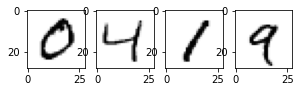

In [ ]:
target_label = 7
position = 14 # 3 means the middle
#backdoor_train_data = BackdoorDataset_nine(x_train_non_7[:5], np.argmax(y_train_non_7[:5], axis=1), target_label, fraction_to_alter=0.5, position=position)

# view the sample images with backdoor
figure = plt.figure()
num_of_images = 5
for index in range(1, num_of_images):
  plt.subplot(1, 5, index)    
  plt.imshow(backdoor_train_data[index][0].numpy().squeeze(), cmap='Greys')

In [ ]:
# performance on original dataset 
# model performance on the test data set 
test(model, device, train_data_original_dataloader,criterion)
# poisoned model on poisoned data 
# we expect the model to have low accuracy if the poisoning has worked 
test(model, device, backdoortest_data_dataloader, criterion)


Test set: Avg. loss: 0.0022, Accuracy: 51505/53735 (96%)


Test set: Avg. loss: 0.0001, Accuracy: 8960/8972 (100%)

